# Weather Data Set
### Python Project
A data analysis project using a readily available weather data set 

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data = pd.read_csv('weather-data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [97]:
data.shape

(8784, 8)

In [98]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [99]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [100]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [101]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [102]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [103]:
data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [104]:
data['Weather'].value_counts

<bound method IndexOpsMixin.value_counts of 0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object>

In [105]:
# Convert the 'Date/Time' column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Set 'date_time' as the index
data.set_index('Date/Time', inplace = True)

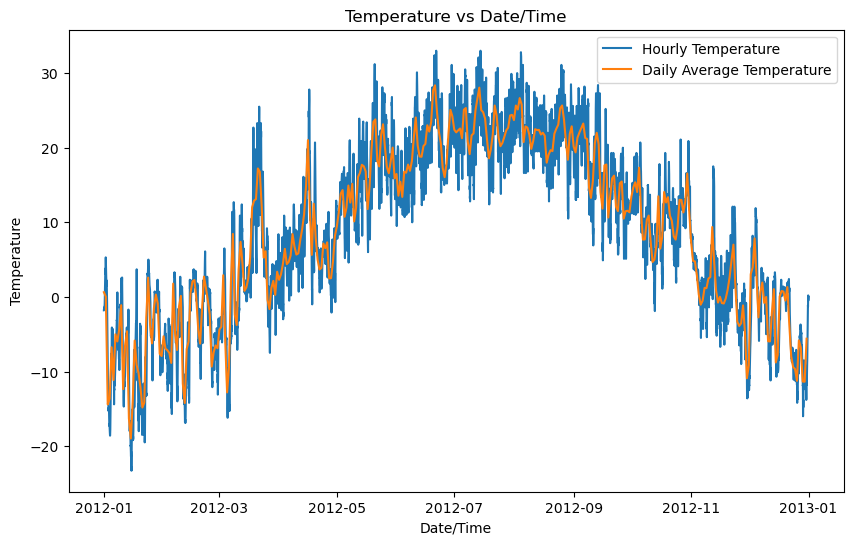

In [106]:
# Resample the data to daily frequency and calculate the mean temperature
daily_avg = data['Temp_C'].resample('D').mean()

# Plotting
plt.figure(figsize = (10, 6))
plt.plot(data['Temp_C'], label = 'Hourly Temperature')
plt.plot(daily_avg, label = 'Daily Average Temperature')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Temperature vs Date/Time')
plt.legend()
plt.show()

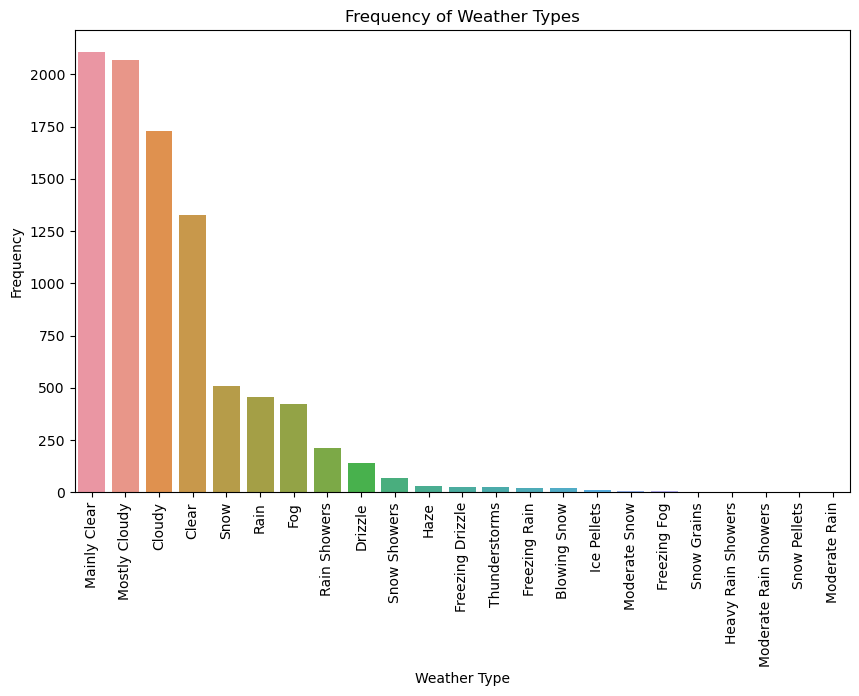

In [107]:
# Split the 'Weather' into individual types
weather = data['Weather'].str.split(',', expand = True)

# Count the frequency of each weather type
weather_counts = weather.stack().value_counts()

# Plotting the different weather types as a bar chart
plt.figure(figsize = (10, 6))
sns.barplot(x = weather_counts.index, y = weather_counts.values)
plt.xlabel('Weather Type')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Types')
plt.xticks(rotation = 90) # Rotate the x-axis labels for better readability
plt.show()

In [108]:
# Function to return the season based on the month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

In [109]:
# Create 'season' column
data['season'] = data.index.month.map(get_season)

# Split the 'weather_type' column into a list of values
data['Weather'] = data['Weather'].str.split(',')

# Explode the DataFrame on 'weather_type' to separate out the values
exploded_df = data.explode('Weather')

In [151]:
# Count the frequency of each value for each season
value_counts = exploded_df.groupby('season')['Weather'].value_counts()

# Reset the index
value_counts = value_counts.reset_index(name='frequency')

# Pivot the DataFrame
pivot_df = value_counts.pivot(index='Weather', columns='season', values='frequency')

# Fill NaN values with 0
pivot_df = pivot_df.fillna(0)

# Reset the index again
pivot_df = pivot_df.reset_index()

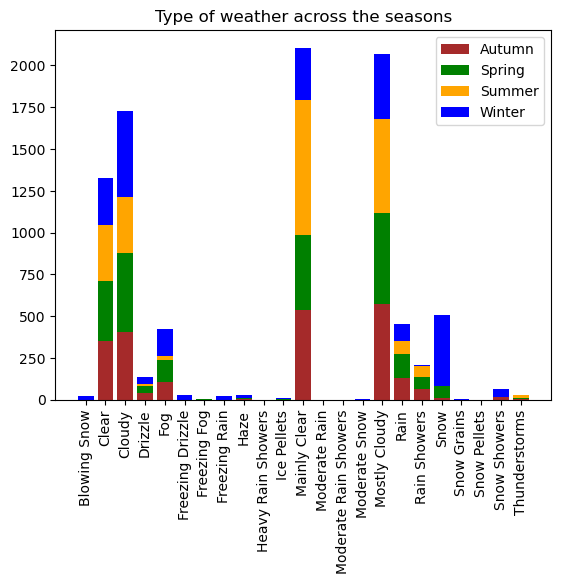

In [162]:
# Create a new figure
fig, ax = plt.subplots()

# Create the stacked bar chart
ax.bar(pivot_df['Weather'], pivot_df['Autumn'], label='Autumn', color = 'Brown')
ax.bar(pivot_df['Weather'], pivot_df['Spring'], bottom=pivot_df['Autumn'], label='Spring', color = 'Green')
ax.bar(pivot_df['Weather'], pivot_df['Summer'], bottom=pivot_df['Autumn']+pivot_df['Spring'], label='Summer', color = 'Orange')
ax.bar(pivot_df['Weather'], pivot_df['Winter'], bottom=pivot_df['Autumn']+pivot_df['Spring']+pivot_df['Summer'], label='Winter', color = 'Blue')

# Add a legend
ax.legend()

# Add a title
ax.set_title('Type of weather across the seasons')  # replace with your actual title

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

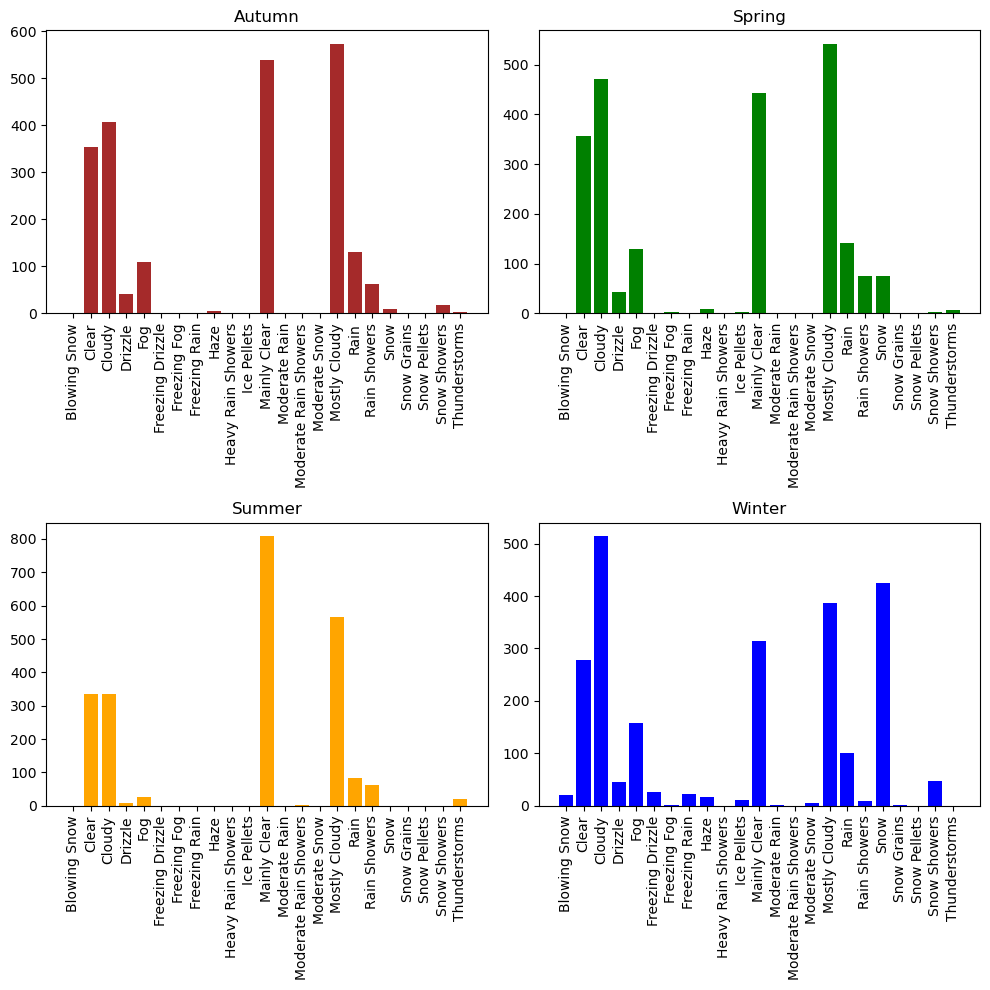

In [173]:
# Create a new figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create the bar charts
axs[0, 0].bar(pivot_df.index, pivot_df['Autumn'], color = 'Brown')
axs[0, 0].set_title('Autumn')
axs[0, 0].set_xticks(range(len(pivot_df['Weather'])))
axs[0, 0].set_xticklabels(pivot_df['Weather'], rotation=90)

axs[0, 1].bar(pivot_df.index, pivot_df['Spring'], color = 'Green')
axs[0, 1].set_title('Spring')
axs[0, 1].set_xticks(range(len(pivot_df['Weather'])))
axs[0, 1].set_xticklabels(pivot_df['Weather'], rotation=90)

axs[1, 0].bar(pivot_df.index, pivot_df['Summer'], color = 'Orange')
axs[1, 0].set_title('Summer')
axs[1, 0].set_xticks(range(len(pivot_df['Weather'])))
axs[1, 0].set_xticklabels(pivot_df['Weather'], rotation=90)

axs[1, 1].bar(pivot_df.index, pivot_df['Winter'], color = 'Blue')
axs[1, 1].set_title('Winter')
axs[1, 1].set_xticks(range(len(pivot_df['Weather'])))
axs[1, 1].set_xticklabels(pivot_df['Weather'], rotation=90)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()